# Introduction

Andrezej generated events with clusters about 1 GeV to "remove" the conditional effects.
This notebook is to check if the inputs are truely what we wanted.


Andrzej investigated this and found the there were photons radiated therefore we observed masses of the clusters smeared around 1 GeV. 

Andrzej: Concerning the asymmetric cluster decay I think it is because the clusters can decay to rho + pi or eta+pi. We could filter them out and check.

In [2]:
import os

import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import sonnet as snt

from gan4hep.utils_plot import add_mean_std, array2hist, view_particle_4vec

from graph_nets import graphs
from gan4hep import rnn_rnn_gan as toGan
from gan4hep.graph import loop_dataset
from gan4hep.graph import read_dataset

In [2]:
evts_per_record = 1000
batch_size = 1000
test_data_name = '/global/homes/x/xju/work/Herwig/Clusters1GeV/inputs/val/all_*.tfrec'

In [3]:
dataset, n_graphs = read_dataset(test_data_name, evts_per_record)
n_batches = n_graphs//batch_size
print("total {} graphs iterated with batch size of {} and {} batches".format(n_graphs, batch_size, n_batches))

total 10000 graphs iterated with batch size of 1000 and 10 batches


In [4]:
test_data = loop_dataset(dataset, batch_size)
truth_4vec = []
input_4vec = []
for inputs, targets in test_data:
    input_4vec.append(inputs.nodes)
    truth_4vec.append(tf.reshape(targets.nodes, [batch_size, -1, 4]).numpy())

In [5]:
len(truth_4vec), targets.nodes.shape, inputs.nodes.shape

(10, TensorShape([3000, 4]), TensorShape([1000, 4]))

In [6]:
truth_4vec = np.concatenate(truth_4vec, axis=0)
input_4vec = np.concatenate(input_4vec)

In [7]:
def get_pt_eta_phi(px, py, pz):
    p = np.sqrt(px**2 + py**2 + pz**2)
    pt = np.sqrt(px**2 + py**2)
    phi = np.arctan2(py, px)
    theta = np.arccos(pz/p)
    eta = -np.log(np.tan(0.5*theta))
    return pt,eta,phi

In [8]:
def view_particle(particles):
    pt, eta, phi = get_pt_eta_phi(particles[:, 1], particles[:, 2], particles[:, 3])
    fig, axs = plt.subplots(2,2, figsize=(8,8))
    axs = axs.flatten()
    axs[0].hist(pt)
    axs[0].set_xlabel("pT [GeV]")
    axs[1].hist(eta)
    axs[1].set_xlabel("$\eta$")
    axs[2].hist(phi)
    axs[2].set_xlabel("$\phi$")
    axs[3].hist(particles[:, 0])
    axs[3].set_xlabel("E [GeV]")
    print("Max pT: {:.2f} GeV".format(np.max(pt)))
    print("Max eta: {:.2f}".format(np.max(np.abs(eta))))
    print("Max E: {:.2f} GeV".format(np.max(particles[:, 0])))

In [9]:
#mask = (np.abs(input_4vec[:, 0] - 1.0) < 1e-5) & (np.abs(input_4vec[:, 3]) < 1e-5)
mask = ...

In [1]:
help(view_particle_4vec)

NameError: name 'view_particle_4vec' is not defined

array([<AxesSubplot:xlabel='$P_x$ [GeV]'>,
       <AxesSubplot:xlabel='$P_y$ [GeV]'>,
       <AxesSubplot:xlabel='$P_z$ [GeV]'>,
       <AxesSubplot:xlabel='$E$ [GeV]'>], dtype=object)

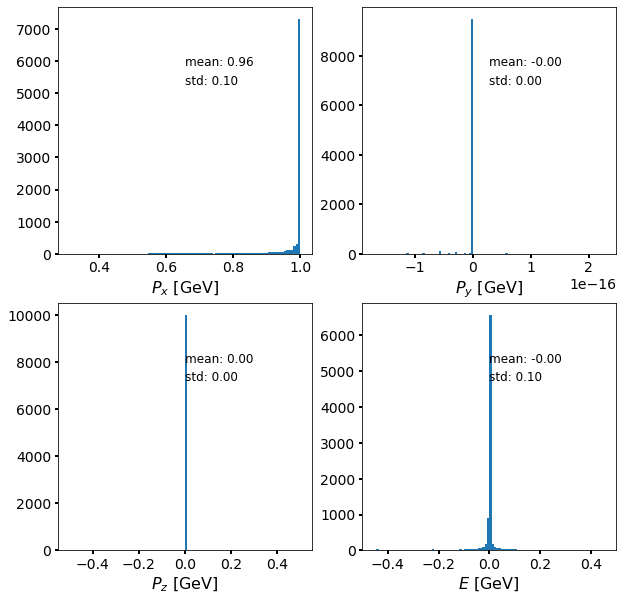

In [11]:
view_particle_4vec(input_4vec[mask])

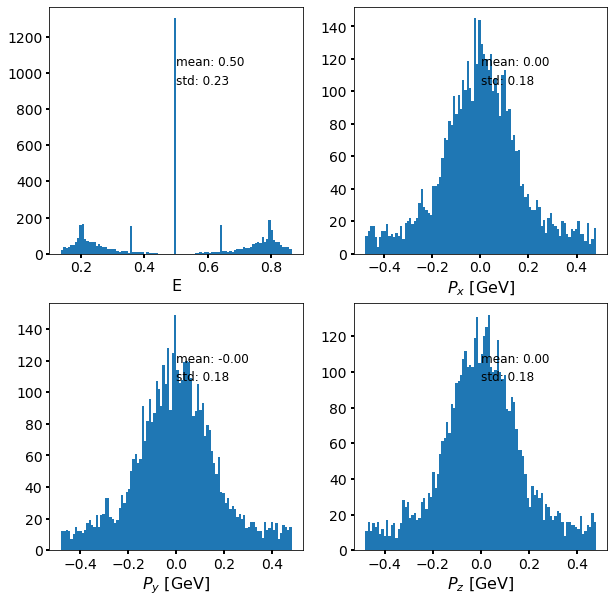

In [19]:
view_particle_4vec(truth_4vec[mask, 1], )

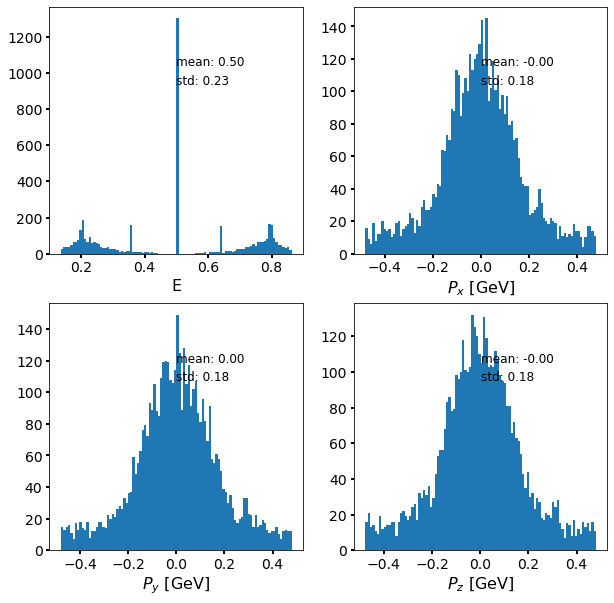

In [20]:
view_particle_4vec(truth_4vec[mask, 2])

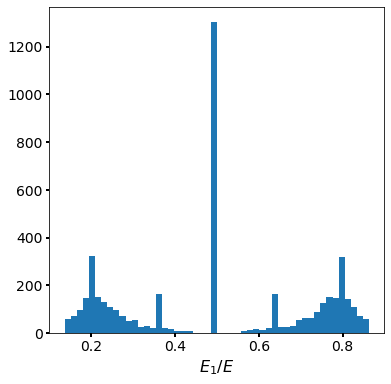

In [21]:
plt.subplots(figsize=(6,6))
plt.hist(truth_4vec[mask, 1, 0]/truth_4vec[mask, 0, 0], bins=50)
plt.xlabel("$E_1$/$E$")
plt.show()

# Another approach

Incoming particle [P, E] decays to two products ($1\to2$ process). 
Product one:
* $e_1 = E * z$
* $p_{x}^{1} = px$

In [16]:
truth_4vec[0]

array([[ 0.960101 ,  0.       ,  0.       ,  0.0398985],
       [ 0.580808 , -0.0423515,  0.21601  ,  0.315452 ],
       [ 0.379293 ,  0.0423515, -0.21601  , -0.27555  ]], dtype=float32)

In [ ]:
[E, px, py, pz] --> MLP -> [px, py, pz, z]